In this week's assignment, we will examine how different statisitcal models are implemented in Python.

In [46]:
import pandas as pd
import seaborn as sns
Location = "gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


It is generally a good idea to visualize any dataset before applying a model, so we will use seaborn to create a pairplot and identify correlation strengths

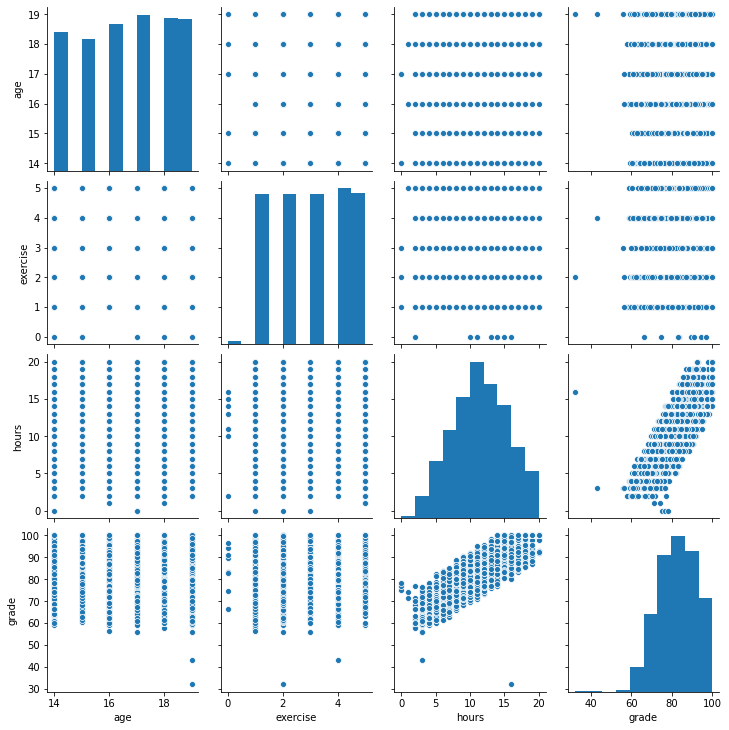

In [16]:
#sns.set_theme(style="ticks")
sns.pairplot(df[['age','exercise','hours', 'grade']])

As a function of grade, we can see that some variables are more correlated than others. There seems to be a strong trend between hours studied and grade, while the strength of the correlation is not as pronounced for age and exercise. Since we need to look at gender, we may as well create a single scatterplot with the grade as a function of hours, and color by gender

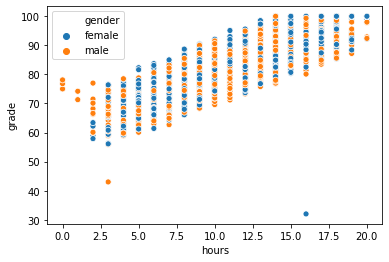

In [25]:
sns.scatterplot(data=df, x="hours", y="grade", hue = "gender")


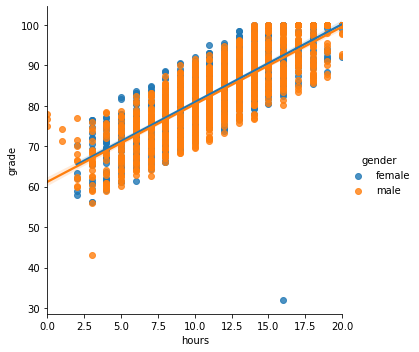

In [29]:
sns.lmplot(data=df, x="hours", y="grade", hue = "gender")


Fitting the model visually, we see that the slope of the line does not change much between the classes. If we fit a model without gender as a variable, we get an overall model based on the f-statistic 

In [30]:
import statsmodels.formula.api as sm
result = sm.ols(
 formula='grade ~ exercise + hours',
 data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1973.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:41:06   Log-Likelihood:                -6300.8
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1997   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5316      0.447    130.828      0.000      57.654      59.409
exercise       0.9892      0.089     11.131      0.000       0.815       1.163
hours          1.9162      0.031     61.575      0.000       1.855       1.977
==============================================================================
Omnibus:                      318.721   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.000
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       7.962   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding gender "naively" to our model.

In [31]:
import statsmodels.formula.api as sm
result = sm.ols(
 formula='grade ~ exercise + hours + gender',
 data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1318.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:42:09   Log-Likelihood:                -6299.3
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1996   BIC:                         1.263e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         58.7621      0.466    126.172      0.000      57.849      59.676
gender[T.male]    -0.4476      0.253     -1.770      0.077      -0.943       0.048
exercise           0.9840      0.089     11.073      0.000       0.810       1.158
hours              1.9170      0.031     61.628      0.000       1.856       1.978
==============================================================================
Omnibus:                      322.999   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2244.206
Skew:                          -0.566   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Without transforming the gender variable, we see that only male is returned for the model, some quick googling will let us transform the column to numeric values instead of strings. Map allows us to abstract away from a loop and apply a set of values over another set of values by using a dictionary.

In [57]:
df['gender'] = df['gender'].map({'male': 0,'female': 1})


In [58]:
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,1,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,0,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,0,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,1,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,1,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


Now that we've transformed the column in place (a new column is not made), we will run the model again

In [59]:
import statsmodels.formula.api as sm
result = sm.ols(
 formula='grade ~ exercise + hours + gender',
 data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1318.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:35:44   Log-Likelihood:                -6299.3
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1996   BIC:                         1.263e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.3145      0.464    125.769      0.000      57.405      59.224
exercise       0.9840      0.089     11.073      0.000       0.810       1.158
hours          1.9170      0.031     61.628      0.000       1.856       1.978
gender         0.4476      0.253      1.770      0.077      -0.048       0.943
==============================================================================
Omnibus:                      322.999   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2244.206
Skew:                          -0.566   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Transforming the variables seems to not impact the model, which leads me to believe that the ols function is already doing it underneath, and doing a transformation ourselves is not necessary.